
# Project: Investigate a Dataset 
# GAPMINDER GDP, Income, Population and HDI

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I chose downloading andworking on https://www.gapminder.org/data/ and chose the following data sets:
 - income per person
 - population
 - GDP
 - Human Development Index HDI
 - GDP / Employee
files were downloaded in .CSV format 


### Question(s) for Analysis
- Have certain regions of the world been growing in regard of the given metrics better than others?
- how those metrics has been peforming through the past few decades in average?
- who are the top countries of the world's top income countries?
- there is a positive corelation between GDP and HDI
- is there a corelation between GDP \ employee and income?
- is there a corelation between population and income?


In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from functools import reduce
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [4]:
#Upgrade pandas to use dataframe.explode() function. 
%pip install --upgrade pandas


The following command must be run outside of the IPython shell:

    $ pip install --upgrade pandas

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_gdp = pd.read_csv('total_gdp_us_inflation_adjusted.csv')
df_pop =pd.read_csv('population_total.csv')
df_hdi = pd.read_csv('hdi_human_development_index.csv')
df_gdp_emp = pd.read_csv('gdpperemployee_us_inflation_adjusted.csv')

In [6]:
df_income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
2,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
3,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
4,United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k



### Data Cleaning

 

> as we see above we need to change few things to make  clean dataframes :
- 1- we need to rearange the data into 3 columns, 'country', 'year', and 'income'
- 2- we need to remove 'k', 'M', 'B' and 'TR' and replaces them with the equivelant number of zeros
- 3- we need to merge all the data in one dataframe that contain all the similar data across all data frames
- 4- we had to slice the data between specific years to make sure that the data is consistant and that added a limitaion to the acuracy of the findings. if we had more data available in 
     HDI and GDP / Employee we could have performed more percise findings and exploration
> methods and functions we will use:
- melt function
- replace
- dropna
- join


In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_income_adj = pd.melt(df_income,['country'], var_name = 'year',value_name = 'income').sort_values(by = ['country', 'year']).reset_index(drop = True)

In [8]:
df_income_adj.head()

,country,year,income
0,Afghanistan,1800,683
1,Afghanistan,1801,683
2,Afghanistan,1802,683
3,Afghanistan,1803,683
4,Afghanistan,1804,683


In [9]:
df_income_adj.income = (df_income_adj.income.replace(r'[kMBTR]+$', '', regex=True).astype(float) * df_income_adj.income.str.extract(r'[\d\.]+([kMBTR]+)', expand=False).fillna(1).replace(['k','M', 'B','TR'], [10**3, 10**6, 10**9, 10**12]).astype(int))
df_income_adj

,country,year,income
0,Afghanistan,1800,683.0
1,Afghanistan,1801,683.0
2,Afghanistan,1802,683.0
3,Afghanistan,1803,683.0
4,Afghanistan,1804,683.0
5,Afghanistan,1805,683.0
6,Afghanistan,1806,683.0
7,Afghanistan,1807,683.0
8,Afghanistan,1808,683.0
9,Afghanistan,1809,683.0


In [10]:
df_income_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48945 entries, 0 to 48944
Data columns (total 3 columns):
country    48945 non-null object
year       48945 non-null object
income     48945 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [11]:
df_income_adj.nunique()

country     195
year        251
income     2495
dtype: int64

In [12]:
df_income_adj.duplicated().sum()

0

In [13]:
df_income_adj.isnull().sum()

country    0
year       0
income     0
dtype: int64

In [14]:
df_income_adj.describe()

,income
count,48945.000000
mean,7972.439248
std,16421.442397
min,224.000000
25%,1050.000000
50%,1980.000000
75%,5960.000000
max,209000.000000


> now we will do the same to all the data sets we have

In [15]:
df_gdp_adj = pd.melt(df_gdp,['country'], var_name = 'year',value_name = 'gdp').sort_values(by = ['country', 'year']).reset_index(drop = True)

In [16]:
df_gdp_adj.head()

,country,year,gdp
0,Afghanistan,1960,NaN
1,Afghanistan,1961,NaN
2,Afghanistan,1962,NaN
3,Afghanistan,1963,NaN
4,Afghanistan,1964,NaN


In [17]:
df_gdp_adj.gdp = (df_gdp_adj.gdp.replace(r'[kMBTR]+$', '', regex=True).astype(float) * df_gdp_adj.gdp.str.extract(r'[\d\.]+([kMBTR]+)', expand=False).fillna(1).replace(['k','M', 'B','TR'], [10**3, 10**6, 10**9, 10**12]).astype(int))
df_gdp_adj

,country,year,gdp
0,Afghanistan,1960,NaN
1,Afghanistan,1961,NaN
2,Afghanistan,1962,NaN
3,Afghanistan,1963,NaN
4,Afghanistan,1964,NaN
5,Afghanistan,1965,NaN
6,Afghanistan,1966,NaN
7,Afghanistan,1967,NaN
8,Afghanistan,1968,NaN
9,Afghanistan,1969,NaN


In [18]:
df_gdp_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12810 entries, 0 to 12809
Data columns (total 3 columns):
country    12810 non-null object
year       12810 non-null object
gdp        9598 non-null float64
dtypes: float64(1), object(2)
memory usage: 300.3+ KB


In [19]:
df_gdp_adj.nunique()

country     210
year         61
gdp        3118
dtype: int64

In [20]:
df_gdp_adj.duplicated().sum()

0

In [21]:
df_gdp_adj.isnull().sum()

country       0
year          0
gdp        3212
dtype: int64

In [22]:
df_gdp_adj.dropna(inplace=True)

In [23]:
df_gdp_adj.isnull().sum()

country    0
year       0
gdp        0
dtype: int64

In [24]:
df_gdp_adj.describe()

,gdp
count,9.598000e+03
mean,2.419578e+11
std,1.100651e+12
min,2.000000e+07
25%,3.610000e+09
50%,1.530000e+10
75%,9.980000e+10
max,2.000000e+13


In [25]:
df_pop_adj = pd.melt(df_pop,['country'], var_name = 'year',value_name = 'population').sort_values(by = ['country', 'year']).reset_index(drop = True)

In [26]:
df_pop_adj.head()

,country,year,population
0,Afghanistan,1800,3.28M
1,Afghanistan,1801,3.28M
2,Afghanistan,1802,3.28M
3,Afghanistan,1803,3.28M
4,Afghanistan,1804,3.28M


In [27]:
df_pop_adj.population = (df_pop_adj.population.replace(r'[kMBTR]+$', '', regex=True).astype(float) * df_pop_adj.population.str.extract(r'[\d\.]+([kMBTR]+)', expand=False).fillna(1).replace(['k','M', 'B','TR'], [10**3, 10**6, 10**9, 10**12]).astype(int))
df_pop_adj

,country,year,population
0,Afghanistan,1800,3280000.0
1,Afghanistan,1801,3280000.0
2,Afghanistan,1802,3280000.0
3,Afghanistan,1803,3280000.0
4,Afghanistan,1804,3280000.0
5,Afghanistan,1805,3280000.0
6,Afghanistan,1806,3280000.0
7,Afghanistan,1807,3280000.0
8,Afghanistan,1808,3280000.0
9,Afghanistan,1809,3280000.0


In [28]:
df_pop_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
country       59297 non-null object
year          59297 non-null object
population    59297 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [29]:
df_pop_adj.nunique()

country        197
year           301
population    4750
dtype: int64

In [30]:
df_pop_adj.duplicated().sum()

0

In [31]:
df_pop_adj.isnull().sum()

country       0
year          0
population    0
dtype: int64

In [32]:
df_hdi_adj = pd.melt(df_hdi,['country'], var_name = 'year',value_name = 'human_development_index').sort_values(by = ['country', 'year']).reset_index(drop = True)

In [33]:
df_hdi_adj.head()

,country,year,human_development_index
0,Afghanistan,1990,0.302
1,Afghanistan,1991,0.307
2,Afghanistan,1992,0.316
3,Afghanistan,1993,0.312
4,Afghanistan,1994,0.307


In [34]:
df_hdi_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 3 columns):
country                    5670 non-null object
year                       5670 non-null object
human_development_index    5152 non-null float64
dtypes: float64(1), object(2)
memory usage: 133.0+ KB


In [35]:
df_hdi_adj.nunique()

country                    189
year                        30
human_development_index    693
dtype: int64

In [36]:
df_hdi_adj.duplicated().sum()

0

In [37]:
df_hdi_adj.isnull().sum()

country                      0
year                         0
human_development_index    518
dtype: int64

In [38]:
df_hdi_adj.dropna(inplace=True)

In [39]:
df_hdi_adj.isnull().sum()

country                    0
year                       0
human_development_index    0
dtype: int64

In [40]:
df_hdi_adj.describe()

,human_development_index
count,5152.000000
mean,0.664015
std,0.165839
min,0.192000
25%,0.537000
50%,0.690000
75%,0.794000
max,0.957000


In [41]:
df_gdp_emp_adj = pd.melt(df_gdp_emp,['country'], var_name = 'year',value_name = 'gdp_per_employee').sort_values(by = ['country', 'year']).reset_index(drop = True)

In [42]:
df_gdp_emp_adj.gdp_per_employee = (df_gdp_emp_adj.gdp_per_employee.replace(r'[kMBTR]+$', '', regex=True).astype(float) * df_gdp_emp_adj.gdp_per_employee.str.extract(r'[\d\.]+([kMBTR]+)', expand=False).fillna(1).replace(['k','M', 'B','TR'], [10**3, 10**6, 10**9, 10**12]).astype(int))
df_gdp_emp_adj

,country,year,gdp_per_employee
0,Afghanistan,1991,2390.0
1,Afghanistan,1992,2230.0
2,Afghanistan,1993,1530.0
3,Afghanistan,1994,1100.0
4,Afghanistan,1995,1550.0
5,Afghanistan,1996,1420.0
6,Afghanistan,1997,1320.0
7,Afghanistan,1998,1240.0
8,Afghanistan,1999,1160.0
9,Afghanistan,2000,1070.0


In [43]:
df_gdp_emp_adj.head()

,country,year,gdp_per_employee
0,Afghanistan,1991,2390.0
1,Afghanistan,1992,2230.0
2,Afghanistan,1993,1530.0
3,Afghanistan,1994,1100.0
4,Afghanistan,1995,1550.0


In [44]:
df_gdp_emp_adj

,country,year,gdp_per_employee
0,Afghanistan,1991,2390.0
1,Afghanistan,1992,2230.0
2,Afghanistan,1993,1530.0
3,Afghanistan,1994,1100.0
4,Afghanistan,1995,1550.0
5,Afghanistan,1996,1420.0
6,Afghanistan,1997,1320.0
7,Afghanistan,1998,1240.0
8,Afghanistan,1999,1160.0
9,Afghanistan,2000,1070.0


In [45]:
df_gdp_emp_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5481 entries, 0 to 5480
Data columns (total 3 columns):
country             5481 non-null object
year                5481 non-null object
gdp_per_employee    5481 non-null float64
dtypes: float64(1), object(2)
memory usage: 128.5+ KB


In [46]:
df_gdp_emp_adj.nunique()

country              189
year                  29
gdp_per_employee    1830
dtype: int64

In [47]:
df_gdp_emp_adj.duplicated().sum()

0

In [48]:
df_gdp_emp_adj.isnull().sum()

country             0
year                0
gdp_per_employee    0
dtype: int64

In [49]:
df_gdp_emp_adj.describe()

,gdp_per_employee
count,5481.000000
mean,27673.318190
std,35757.404233
min,406.000000
25%,3530.000000
50%,11800.000000
75%,37500.000000
max,262000.000000


> now we will join the data frames in a universal data frame so we can execute the analysis upon.

In [50]:
dfs= [df_income_adj,df_gdp_adj,df_gdp_emp_adj,df_pop_adj,df_hdi_adj ]
uni_df = reduce(lambda  left,right: pd.merge(left,right,on=['country','year'],how='inner'), dfs)


In [51]:
uni_df.head()

,country,year,income,gdp,gdp_per_employee,population,human_development_index
0,Afghanistan,2002,1190.0,7.230000e+09,1520.0,22600000.0,0.384
1,Afghanistan,2003,1240.0,7.870000e+09,1560.0,23700000.0,0.393
2,Afghanistan,2004,1200.0,7.980000e+09,1500.0,24700000.0,0.409
3,Afghanistan,2005,1290.0,8.870000e+09,1600.0,25700000.0,0.418
4,Afghanistan,2006,1320.0,9.350000e+09,1640.0,26400000.0,0.429


In [52]:
uni_df.year.min()

'1991'

In [53]:
uni_df[uni_df.year == '1991']

,country,year,income,gdp,gdp_per_employee,population,human_development_index
18,Albania,1991,3500.0,3.800000e+09,3420.0,3.280000e+06,0.631
47,Algeria,1991,8430.0,7.950000e+10,17000.0,2.640000e+07,0.576
97,Argentina,1991,15200.0,2.900000e+11,16900.0,3.310000e+07,0.725
126,Armenia,1991,4620.0,5.160000e+09,4090.0,3.510000e+06,0.648
155,Australia,1991,30500.0,6.280000e+11,79500.0,1.720000e+07,0.871
184,Austria,1991,38400.0,2.490000e+11,76900.0,7.770000e+06,0.808
258,Bahrain,1991,41800.0,1.000000e+10,44900.0,5.100000e+05,0.755
287,Bangladesh,1991,1540.0,5.470000e+10,1260.0,1.060000e+08,0.401
316,Barbados,1991,13400.0,3.770000e+09,34700.0,2.620000e+05,0.733
370,Belgium,1991,36000.0,2.990000e+11,88000.0,1.000000e+07,0.817


In [54]:
uni_df.year.max()

'2019'

In [55]:
uni_df[uni_df.year == '2019']

,country,year,income,gdp,gdp_per_employee,population,human_development_index
17,Afghanistan,2019,2070.0,2.110000e+10,2280.0,38000000.0,0.511
46,Albania,2019,13700.0,1.300000e+10,11700.0,2880000.0,0.795
75,Algeria,2019,11500.0,1.770000e+11,18100.0,43100000.0,0.748
96,Angola,2019,6670.0,1.100000e+11,8070.0,31800000.0,0.581
125,Argentina,2019,22100.0,5.710000e+11,23300.0,44800000.0,0.845
154,Armenia,2019,13700.0,1.290000e+10,13900.0,2960000.0,0.776
183,Australia,2019,49300.0,1.490000e+12,114000.0,25200000.0,0.944
212,Austria,2019,55800.0,4.140000e+11,101000.0,8960000.0,0.922
237,Azerbaijan,2019,14400.0,5.360000e+10,12100.0,10000000.0,0.756
257,Bahamas,2019,36400.0,1.250000e+10,51900.0,389000.0,0.814


In [56]:
uni_df.isnull().sum()

country                    0
year                       0
income                     0
gdp                        0
gdp_per_employee           0
population                 0
human_development_index    0
dtype: int64

In [57]:
uni_df.to_csv('uni_df.csv', index = None)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Have certain regions of the world been growing in regard of the given metrics better than others?

In [58]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
uni_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4672 entries, 0 to 4671
Data columns (total 7 columns):
country                    4672 non-null object
year                       4672 non-null object
income                     4672 non-null float64
gdp                        4672 non-null float64
gdp_per_employee           4672 non-null float64
population                 4672 non-null float64
human_development_index    4672 non-null float64
dtypes: float64(5), object(2)
memory usage: 292.0+ KB


In [59]:
uni_df.describe()

,income,gdp,gdp_per_employee,population,human_development_index
count,4672.000000,4.672000e+03,4672.000000,4.672000e+03,4672.000000
mean,17245.038741,3.486910e+11,27530.370077,3.931572e+07,0.664199
std,19001.622271,1.406147e+12,36537.045287,1.413877e+08,0.166554
min,437.000000,1.570000e+08,407.000000,9.520000e+04,0.192000
25%,3580.000000,8.630000e+09,3747.500000,3.110000e+06,0.534000
50%,9910.000000,3.110000e+10,11800.000000,8.880000e+06,0.687000
75%,24900.000000,1.792500e+11,34700.000000,2.640000e+07,0.797000
max,121000.000000,2.000000e+13,262000.000000,1.430000e+09,0.957000


here we will discover how countires has been doing regarding every metric

In [60]:
uni_country= uni_df.drop(columns = ['year'], axis = 'columns').groupby('country').mean()
uni_country.head()

,income,gdp,gdp_per_employee,population,human_development_index
country,,,,,
Afghanistan,1744.444444,1.456111e+10,2112.777778,3.021111e+07,0.463833
Albania,8212.068966,8.113793e+09,8241.034483,3.041034e+06,0.709103
Algeria,9931.379310,1.223621e+11,17037.931034,3.386897e+07,0.673414
Angola,5976.190476,8.306667e+10,8169.047619,2.299524e+07,0.502619
Argentina,20337.931034,4.613448e+11,22651.724138,3.892414e+07,0.795517


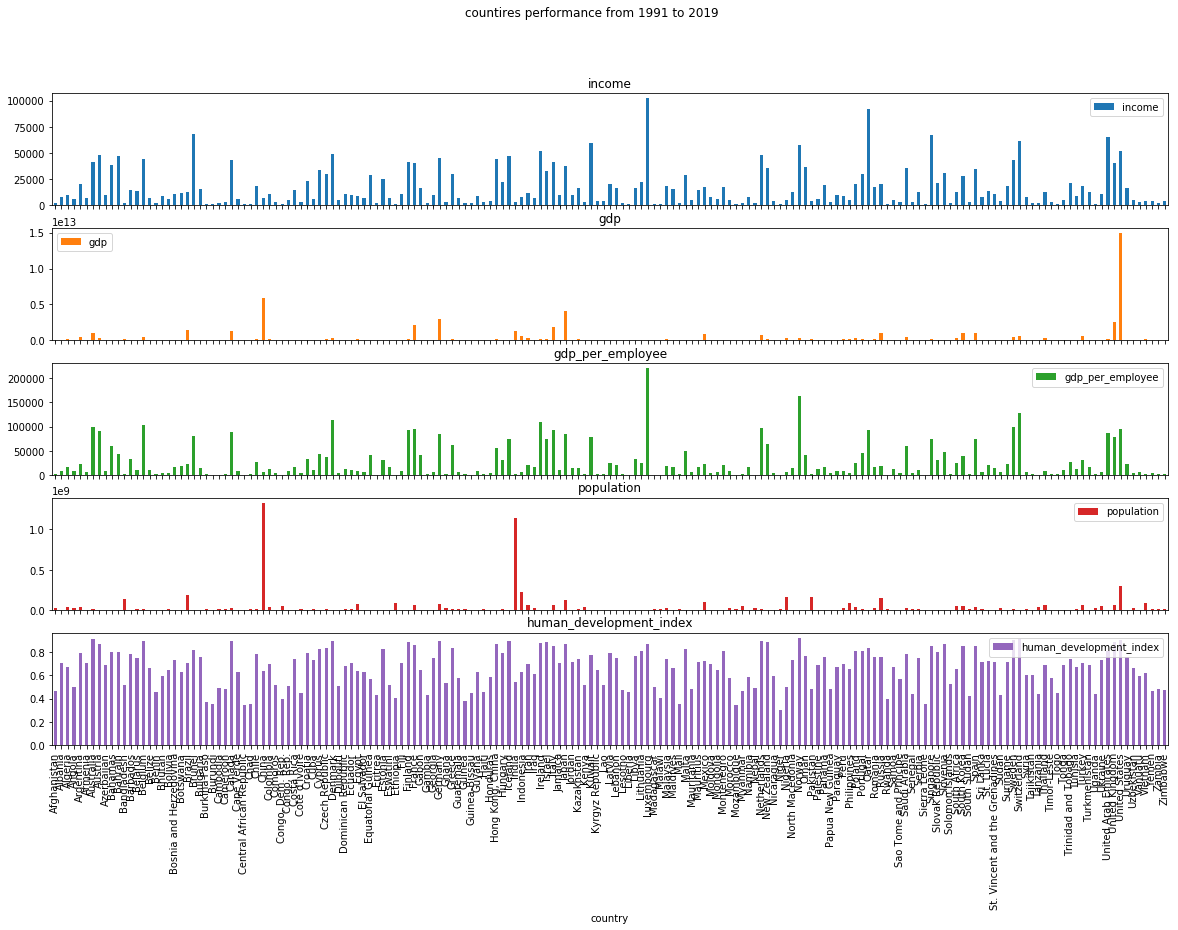

In [61]:
uni_country.plot(kind= 'bar',figsize = (20,12),subplots = True, title = 'countires performance from 1991 to 2019');

In [62]:
uni_country.income.max()
uni_country[uni_country['income']==102355.1724137931]

,income,gdp,gdp_per_employee,population,human_development_index
country,,,,,
Luxembourg,102355.172414,4.665862e+10,220758.62069,478931.034483,0.871276


In [63]:
uni_country.gdp.max()
uni_country[uni_country['gdp']==670586206896.5518]

,income,gdp,gdp_per_employee,population,human_development_index
country,,,,,
Netherlands,48162.068966,6.705862e+11,96420.689655,1.625172e+07,0.898655


In [64]:
uni_country.gdp_per_employee.max()
uni_country[uni_country['gdp_per_employee']==220758.62068965516]

,income,gdp,gdp_per_employee,population,human_development_index
country,,,,,
Luxembourg,102355.172414,4.665862e+10,220758.62069,478931.034483,0.871276


In [65]:
uni_country.population.max()
uni_country[uni_country['population']==1325517241.3793104]

,income,gdp,gdp_per_employee,population,human_development_index
country,,,,,
China,6851.034483,5.835517e+12,6241.034483,1.325517e+09,0.640897


In [66]:
uni_country.human_development_index.max()
uni_country[uni_country['human_development_index']==0.9204137931034483]

,income,gdp,gdp_per_employee,population,human_development_index
country,,,,,


> from above data and visualization we will find that: 
- the best performing country regarding income and GDP per employee is Luxembourg
- the best performing country regarding GDP is Netherlands
- the best performing country regarding HDI is Norway
> so generally this region in europ was the best performing through out the past few decades
- the most developing country regarding population is China then India

### Research Question 2: how those metrics has been peforming through the past few decades in average?

> lets discover how every metric has been doing by yearly analysis of the mean of every metric

In [67]:
# metrics means worlwide
uni_mean= uni_df.drop(columns = ['country'], axis = 'columns').groupby('year').mean()
uni_mean.head()

,income,gdp,gdp_per_employee,population,human_development_index
year,,,,,
1991,13114.817460,2.724541e+11,23839.142857,3.949671e+07,0.591294
1992,13372.914062,2.741803e+11,24252.054688,3.955003e+07,0.595844
1993,13510.550388,2.770651e+11,24563.790698,3.987672e+07,0.598822
1994,13839.868217,2.861896e+11,25056.007752,4.042362e+07,0.603116
1995,14130.248227,2.721903e+11,25167.539007,3.785301e+07,0.616340


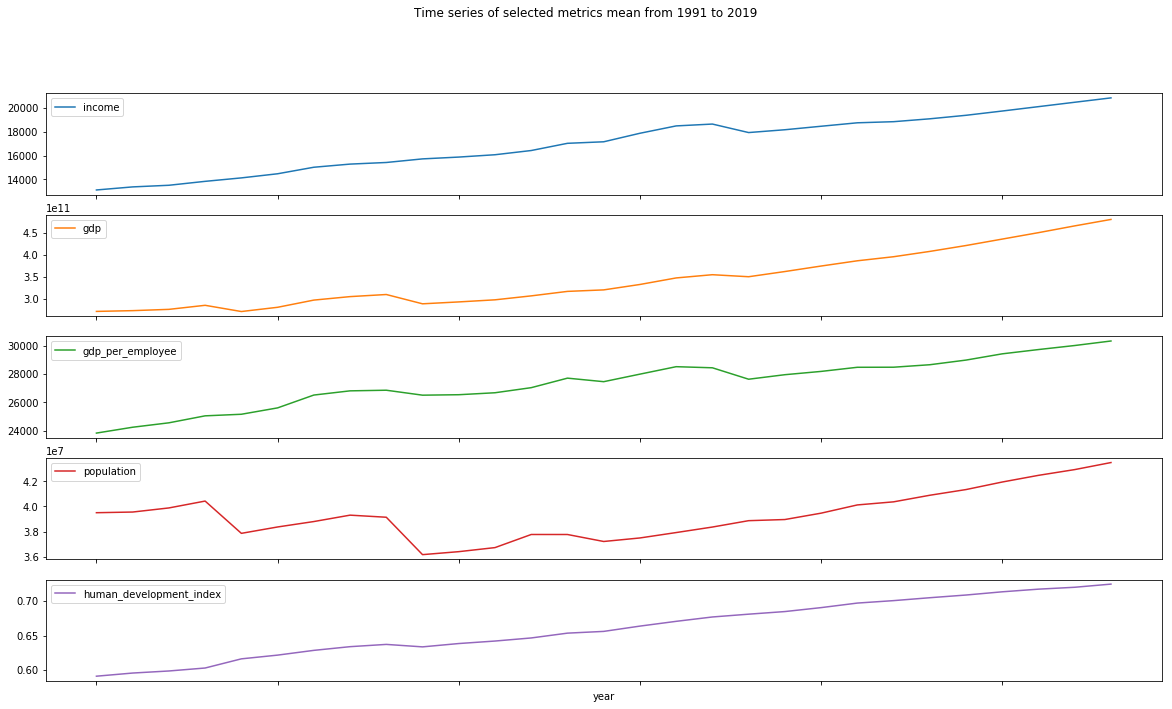

In [68]:
uni_mean.plot(figsize = (20,12),subplots = True, title = 'Time series of selected metrics mean from 1991 to 2019',);


> all the metrics has been developing constantly in general but we can see the mid 2000s financial crisis and effect on global GDP. also we can observe a change in the population increasment that was declining till the begining of the millennium and then started to increrase constantly

### Research Question 3: who are the top 25% of the world's top income countries?

In [69]:
uni_df.describe()

,income,gdp,gdp_per_employee,population,human_development_index
count,4672.000000,4.672000e+03,4672.000000,4.672000e+03,4672.000000
mean,17245.038741,3.486910e+11,27530.370077,3.931572e+07,0.664199
std,19001.622271,1.406147e+12,36537.045287,1.413877e+08,0.166554
min,437.000000,1.570000e+08,407.000000,9.520000e+04,0.192000
25%,3580.000000,8.630000e+09,3747.500000,3.110000e+06,0.534000
50%,9910.000000,3.110000e+10,11800.000000,8.880000e+06,0.687000
75%,24900.000000,1.792500e+11,34700.000000,2.640000e+07,0.797000
max,121000.000000,2.000000e+13,262000.000000,1.430000e+09,0.957000


In [70]:
best_income=uni_df[uni_df['income'] > 24900.000000]
best_income=best_income.drop(columns = ['year'], axis = 'columns').groupby('country').mean()
best_income.head()

,income,gdp,gdp_per_employee,population,human_development_index
country,,,,,
Australia,40958.620690,1.031310e+12,98506.896552,2.073103e+07,0.912069
Austria,48189.655172,3.336552e+11,91503.448276,8.292069e+06,0.869828
Bahamas,38060.000000,1.162000e+10,59665.000000,3.477000e+05,0.804700
Bahrain,46800.000000,2.120345e+10,43331.034483,9.648966e+05,0.801586
Belgium,44631.034483,3.952759e+11,102789.655172,1.066897e+07,0.891103


In [71]:
best_income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Australia to United States
Data columns (total 5 columns):
income                     55 non-null float64
gdp                        55 non-null float64
gdp_per_employee           55 non-null float64
population                 55 non-null float64
human_development_index    55 non-null float64
dtypes: float64(5)
memory usage: 2.6+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98b96482b0>], dtype=object)

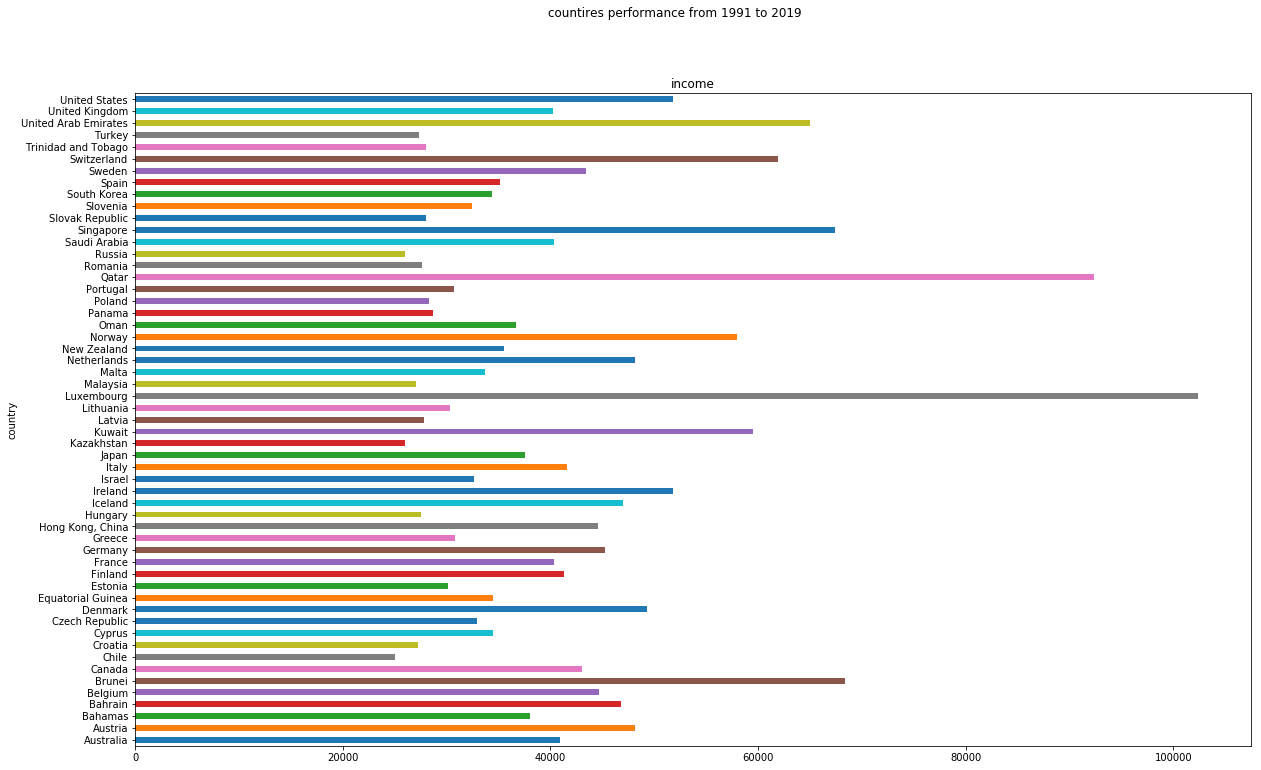

In [72]:
best_income.income.plot(kind= 'barh',figsize = (20,12),subplots = True,title = 'countires performance from 1991 to 2019')

ok so let us sort them for more clear review

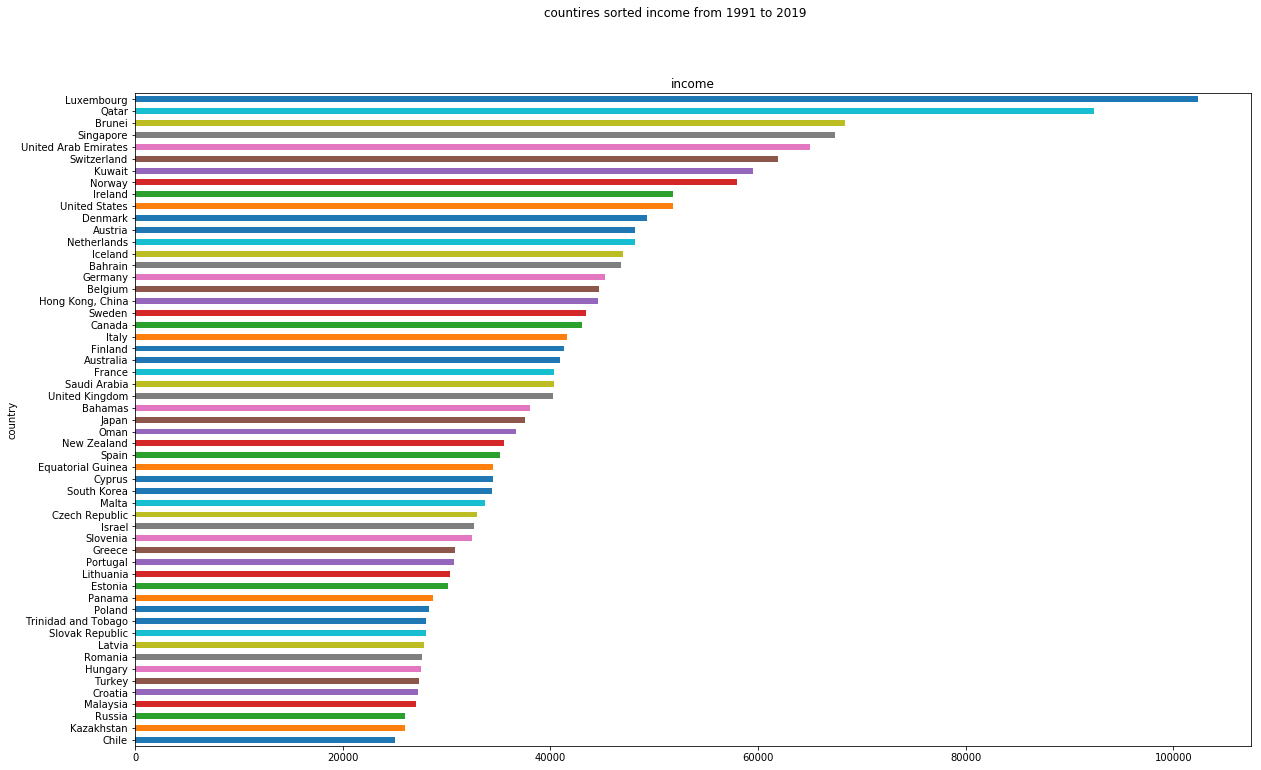

In [73]:
best_income_sorted= best_income.sort_values(by=['income'])
best_income_sorted.income.plot(kind= 'barh',figsize = (20,12),subplots = True,title = 'countires sorted income from 1991 to 2019');

let us check who are the top 10 countries regarding income:

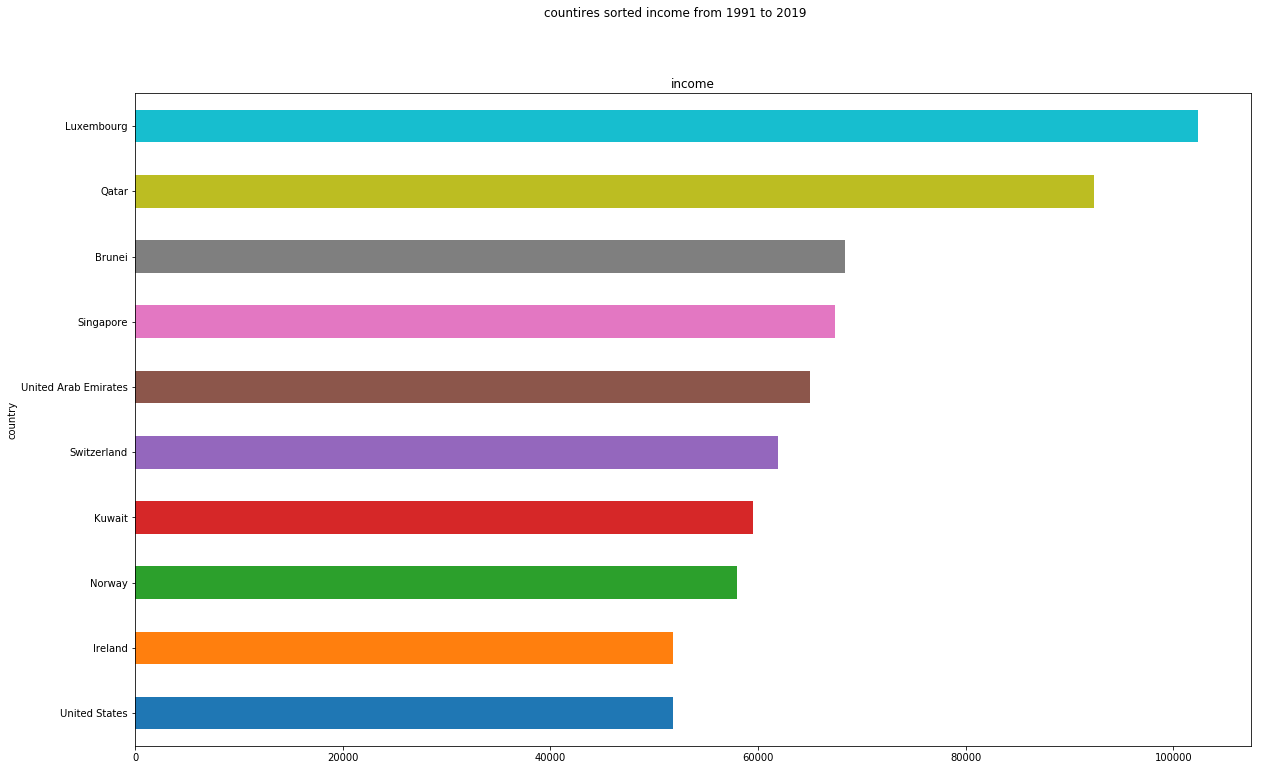

In [74]:
top_10_income=best_income_sorted.income[-10:]
top_10_income.plot(kind= 'barh',figsize = (20,12),subplots = True,title = 'countires sorted income from 1991 to 2019');

and here is the list of them in an ascending orer from lowest to highets

In [75]:
print(top_10_income)

country
United States            51800.000000
Ireland                  51844.827586
Norway                   57965.517241
Kuwait                   59507.142857
Switzerland              61917.241379
United Arab Emirates     64955.172414
Singapore                67424.137931
Brunei                   68355.172414
Qatar                    92320.000000
Luxembourg              102355.172414
Name: income, dtype: float64


### Research Question 4: is there a corelation between GDP and HDI in the best income performing countries?

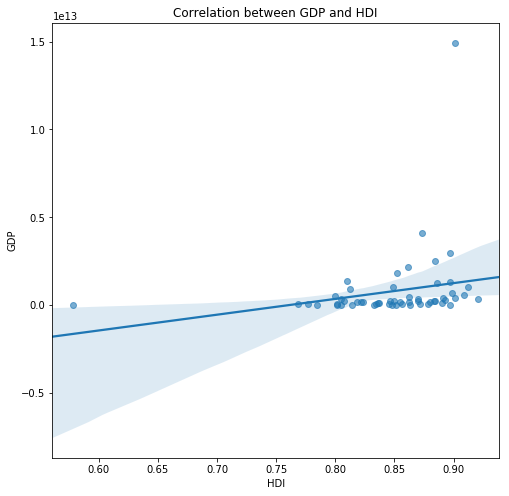

In [76]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.regplot(data = best_income, x = 'human_development_index', y = 'gdp', fit_reg = True, scatter_kws = {'alpha':0.6}, ax = ax)
ax.set_title('Correlation between GDP and HDI')
ax.set_xlabel('HDI')
ax.set_ylabel('GDP')

plt.show()

there is a positive corelation between GDP and HDI

### Research Question 5: is there a corelation between GDP \ employee and income?

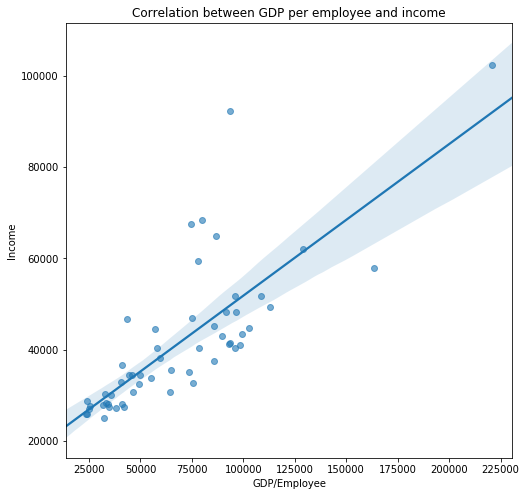

In [77]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
fig, ax = plt.subplots(figsize = (8, 8))
sns.regplot(data = best_income, x = 'gdp_per_employee', y = 'income', fit_reg = True, scatter_kws = {'alpha':0.6}, ax = ax)

ax.set_title('Correlation between GDP per employee and income')
ax.set_xlabel('GDP/Employee')
ax.set_ylabel('Income')

plt.show();

also we can see her a positive corelation between GDP/ Employee and income

### Research Question 6: is there a corelation between population and income?

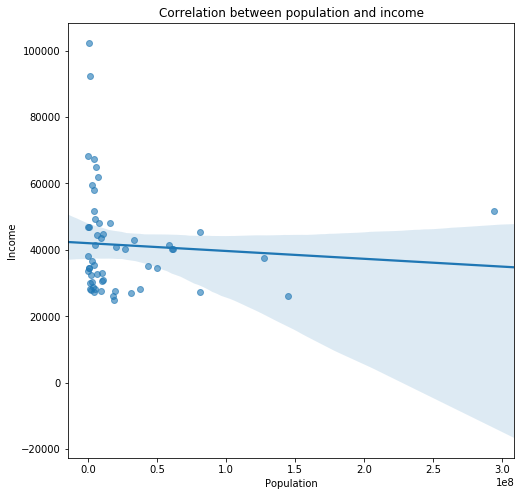

In [78]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
fig, ax = plt.subplots(figsize = (8, 8))
sns.regplot(data = best_income, x = 'population', y = 'income', fit_reg = True, scatter_kws = {'alpha':0.6}, ax = ax)

ax.set_title('Correlation between population and income')
ax.set_xlabel('Population')
ax.set_ylabel('Income')

plt.show()

and here there is a slight negative corelation between population and income

<a id='conclusions'></a>
## Conclusions

> finally after working on Gapminder data for income, gdp, population, gdp / employee and HDI. the findings for the suggested questions were:
- Have certain regions of the world been growing in regard of the given metrics better than others?
  -  the best performing country regarding income and GDP per employee is Luxembourg
  - the best performing country regarding GDP is Netherlands
  - the best performing country regarding HDI is Norway
  - so generally this region in europ was the best performing through out the past few decades
  - the most developing country regarding population is China then India
  - 

- how those metrics has been peforming through the past few decades in average?
   - all the metrics has been developing constantly in general but we can see the mid 2000s financial crisis and effect on global GDP. also we can observe a change in the population increasment that was declining till the begining of the millennium and then started to increrase constantly

- who are the top 25% of the world's top income countries?
  - a list and a graph was developed then a more detailed and sorted output has been improved for the top 10 countries regarding income which are:

   - 10- United States:            51800.000000
   - 9- Ireland:                  51844.827586
   - 8- Norway:                   57965.517241
   - 7- Kuwait:                   59507.142857
   - 6- Switzerland:              61917.241379
   - 5- United Arab Emirates:     64955.172414
   - 4- Singapore:                67424.137931
   - 3- Brunei:                   68355.172414
   - 2- Qatar:                    92320.000000
   - 1- Luxembourg:              102355.172414
- is there a corelation between GDP and HDI in the best income performing countries?
   - there is a positive corelation between GDP and HDI
- is there a corelation between GDP \ employee and income?
   - also we can see her a positive corelation between GDP/ Employee and income
- is there a corelation between population and income?
   - and here there is a slight negative corelation between population and income

> we could have made further detailed investigation for top countries regarding GDP, HDI, Population and GDP / Employee and develop more visuals but for the sake of the requested rubrik I hope this is enough here.

as a new comer to the programming field and data analysis am so glad and happy of the efforts and time you invested in us.. it's an honor to be preseneting a prject to you.

### THANK YOU SO MUCH.


In [79]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0